# Lesson 4


Open L04-03-AS-AutoHypothesis.ipynb and use the Automobile Price Dataset to test hypotheses for the price of automobiles:

- Compare and test Normality the distributions of price and log price
- Use both a graphical method and a formal test. Hint: Remember these relationships will always be approximate. Use the distribution that fits best for the rest of this exercise.
- Test significance of price (or log price) stratified by:  
    a) fuel type  
    b) aspiration  
    c) rear vs. front wheel drive.  
    Use both graphical methods and the formal test.
- Apply ANOVA and Tukey's HSD test to the auto price data to compare the price (or log price, if closer to a Normal distribution) of autos stratified by body style.
- Graphically explore the differences between the price conditioned (grouped) by the categories of each variable. If any of these relationships are statistically significant, are  they large enough to be important to your client? Is this importance evident in your graphics?

Hint: Make sure you have enough data for each category and drop categories with insufficient data.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.stats as st
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Automobile price data _Raw_.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# throw out non numeric prices
df = df[df['price'].apply(lambda x: x.isnumeric())]
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


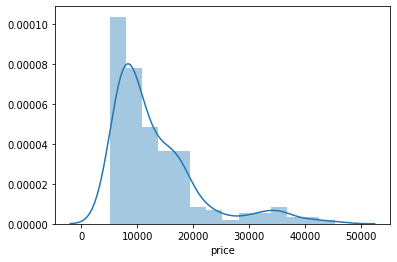

In [4]:
# is price normally distributed?
# answer this graphically:
sns.distplot(df['price']);
# looks NOT normal... bimodal.

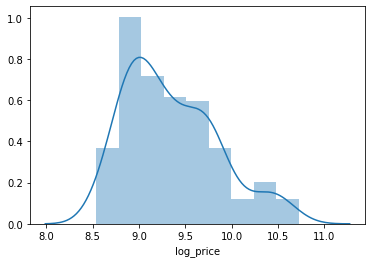

In [5]:
# is log price normally distributed?
df['log_price'] = np.log(df['price'])
sns.distplot(df['log_price']);

This looks better, but we should totally run actual stats tests on these to see if we have normality

In [6]:
# Does price come from a normal distribution?
k2, p = stats.normaltest(df['price'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 9.57961e-18
The null hypothesis can be rejected


In [7]:
# Does log price come from a normal distribution?
k2, p = stats.normaltest(df['log_price'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.000948706
The null hypothesis can be rejected


### Looks like we're using log(price) for the rest of the homework!

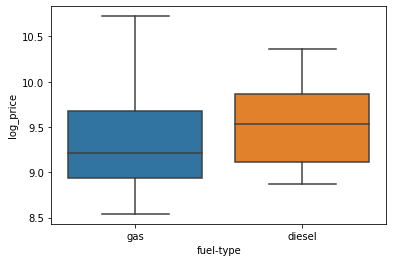

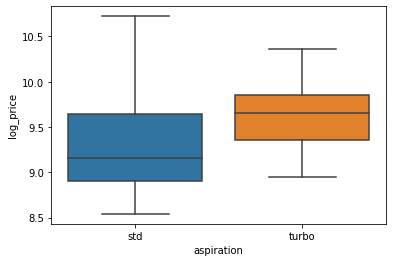

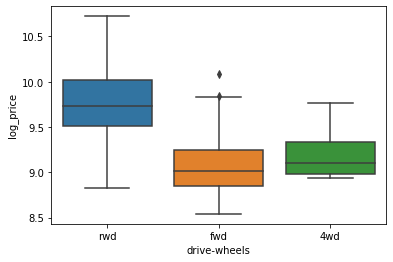

In [8]:
# Test significance of price (or log price) stratified by 
#    a) fuel type 
#    b) aspiration
#    c) rear vs. front wheel drive. 
# Use both graphical methods and the formal test.

test_cols = ['fuel-type', 'aspiration', 'drive-wheels']

for c in test_cols:
    sns.boxplot(x = df[c], y = df['log_price']);
    plt.show()

In [9]:
test_cols = ['fuel-type', 'aspiration', 'drive-wheels']
for c in test_cols:
    Tukey_HSD = pairwise_tukeyhsd(df['log_price'], df[c])
    print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
diesel    gas  -0.2302 0.0515 -0.462 0.0015  False
--------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   std  turbo    0.336 0.001 0.1595 0.5125   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   4wd    fwd   -0.119 0.6367 -0.4355 0.1975  False
   4wd    rwd   0.5986  0.001  0.2764 0.9208   True
   fwd    rwd   0.7176  0.001  0.5896 0.8455   True
---------------------------------------------------


### So:
- fuel type has no effect
- aspiration DOES
- FWD and 4 wheel drive vehicles have an effect as well


In [15]:
# rename a column...
df['body'] = df['body-style']
model = ols('price ~ body', data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df        sum_sq       mean_sq         F        PR(>F)
body        4.0  1.983646e+09  4.959114e+08  9.128752  8.779795e-07
Residual  196.0  1.064753e+10  5.432412e+07       NaN           NaN


In [16]:
test_cols = ['body-style']
for c in test_cols:
    Tukey_HSD = pairwise_tukeyhsd(df['log_price'], df[c])
    print(Tukey_HSD)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------------
convertible   hardtop  -0.0966    0.9 -0.7933     0.6  False
convertible hatchback  -0.7628 0.0016 -1.3122 -0.2134   True
convertible     sedan  -0.4519 0.1522 -0.9951  0.0913  False
convertible     wagon  -0.5399 0.0873 -1.1264  0.0465  False
    hardtop hatchback  -0.6662 0.0018 -1.1483  -0.184   True
    hardtop     sedan  -0.3553 0.2422 -0.8304  0.1198  False
    hardtop     wagon  -0.4433   0.14 -0.9673  0.0807  False
  hatchback     sedan   0.3109  0.001  0.1055  0.5163   True
  hatchback     wagon   0.2229 0.2536 -0.0788  0.5246  False
      sedan     wagon   -0.088    0.9 -0.3783  0.2023  False
------------------------------------------------------------


In [28]:
# Graphically explore the differences between the price conditioned (grouped) by the categories of each variable. 
# If any of these relationships are statistically significant, are they large enough to be important to your client? 
# Is this importance evident in your graphics?

# Hint: Make sure you have enough data for each category and drop categories with insufficient data.

# Well, with that hint let's look at the columns...
for c in df.select_dtypes(exclude=['number', 'int']):
    print(df[c].value_counts())

?      37
161    11
91      8
150     7
128     6
134     6
104     6
94      5
103     5
95      5
85      5
102     5
168     5
65      5
74      5
148     4
106     4
93      4
122     4
118     4
125     3
115     3
101     3
154     3
83      3
137     3
164     2
153     2
108     2
89      2
87      2
158     2
197     2
113     2
194     2
145     2
110     2
188     2
129     2
192     2
119     2
81      2
142     1
256     1
121     1
90      1
98      1
107     1
77      1
186     1
231     1
78      1
Name: normalized-losses, dtype: int64
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
isuzu             2
mercury           1
Na

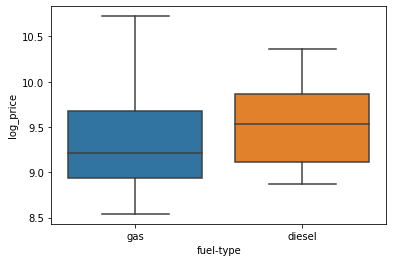

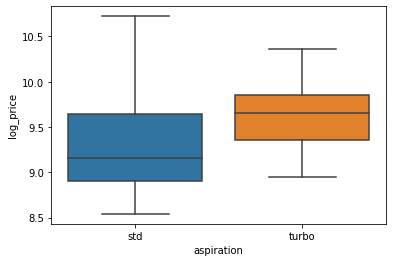

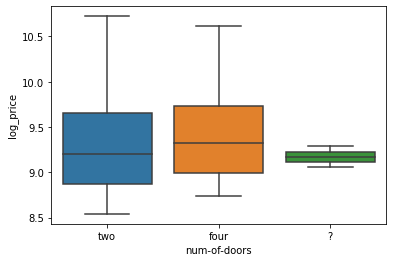

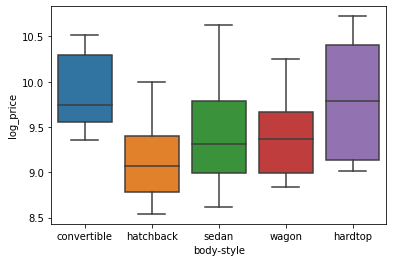

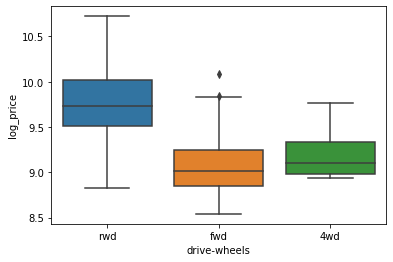

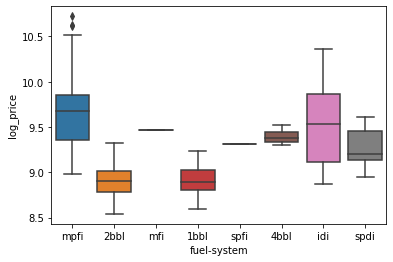

In [30]:
# Looks like some columns we should throw out
# since they don't have enough observations to be considered.
# I'm looking at you 'engine-location'...
keep_cols = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'fuel-system']
for c in keep_cols:
    sns.boxplot(x = df[c], y = df['log_price']);
    plt.show()

#### Looking at the graphs:  
    - body style  
    - fuel system  
    - drive (rear wheel vs front vs 4 wd)  
    
All seem to be important enough that they actually seperate on price.